In [96]:
dataset2 = pd.read_csv("../dataset/bank_marketing/bank-full.csv", delimiter=";")

In [1]:
drop_indexes = []
for index, row in dataset2.iterrows():
    if ((index % 5 == 0 or index % 3 == 0) and (row.y == "no")):
        drop_indexes.append(index)  

NameError: name 'dataset2' is not defined

In [ ]:
len(drop_indexes)
dataset = dataset2.drop(drop_indexes)

In [2]:
dataset.y.value_counts()

NameError: name 'dataset' is not defined

In [3]:
dataset.to_csv("../dataset/bank_marketing/bank-workshop.csv", index=False)

NameError: name 'dataset' is not defined

# Intro

## Machine Learning (ML)

TODO <br>
think at a better intro

- Machine Learning is a way to find patterns in our data and based on these patterns to make new predictions.
- ML is about the task of learning a mapping function from inputs to outputs.




### ML use-cases
[Digit recognition](http://bit.ly/2x8FF2s) <br>
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images <br>

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) <br>
We need to predict if a person survived or didn't survive on Titanic

[Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales) <br>
We need to predict total sales for every product and store in the next month <br>

Above ML use-cases are extracted from Kaggle competitions. Kaggle is the most popular online platform where we can test, learn and share our ML skills. <br>

If we start to think at the big companies which we are almost using daily, like Facebook, Google, Amazon, Twitter... most of them functionalities are implemented using ML. <br>

I'm almost sure that if you start to think 5 minutes, you can see some functionalities from you project/product which can be implemented with ML.





## ML requirements
<b>Data</b> <br>
To develop a ML project, first we need a dataset. <br>

There are hundreds of dataset available online for free and waiting to be used !
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [ask google](https://www.google.com/search?ei=R2QMXZD9MNaD8gL4uYPoCw&q=machine+learning+open+datasets&oq=machine+learning+open+datasets&gs_l=psy-ab.3..0i203j0i8i30.5101.6297..6496...1.0..0.128.673.0j6......0....1..gws-wiz.......0i71j35i304i39j0i7i30j0i13j0i8i7i30j0i7i30i19j0i8i7i30i19j0i19j0i8i13i30i19.lyx-wjPDejE)

If we don't already have in place a dataset, we need first to plan how to collect and store our data. <br>
This phase of how to store the data is very important, because based on it rely most our ML project work. <br>
It is well known that approx. 80% from a ML project development is spend on data exploration, data cleaning, data transformation.

<b>Software (ML libraries) </b> <br>
Yes, it's true that ML algorithms are based on mathematic. But it's also true that most of these algorithms are already implemented in a lot of libraries, so we don't need to know all the math details of how are they implemented. <br>
Most of the time, is it enough to have a general understanding of what a ML algorithm does to apply it with success on our project. Of course, if you deep dive into the details implementation, you will start to master it and if you master something you will have a better success. <br>

OK, we know that there are ML libraries to use but what programming languages do we need to know to use them ? The most common ones are Python and R. There are also libraries written for example in Java, .Net, Scala, but either are in to early stage, implements only a few algorithms, those algorithms aren't the most efficent ones implemented and have a weak comunity/suport behind them. <br>

Python and R are the most common programming languages when it's about ML. Python has the advantage that has a strong and large community itself and also that the last best ML libraries are supporting Python. R language was very used in the past, but it doesn't seems to have an ascending path in the last years. 

Most common Python libraries : (look in how to win a kaggle competition for other libraries)
- Scikit-learn
- Theano
- TensorFlow
- Keras
- PyTorch

Nowadays, it's pretty easy to install and use these libraries. We can either install them on our personal computers or access them from cloud services. Just to see how important and useful are them for software industry, all of the biggest cloud provides created services around them :
- amazon
- microsoft
- google
- lentiq or bigstep ?


<b>Hardware</b> <br>
Every software solution needs hardware. This is the case also for ML. <br>
Hardware specifications are related to the type of project and mostly to the volume of data. If the volume of data if big, we clearly will need more power(CPU, memory) to proccess it. <br>

For computer vision, is indicated to have a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), a good processor and few tens of memory gigabytes. For traditional ML datasets, where most of the time we have [structure data](https://en.wikipedia.org/wiki/Data_structure) and few hundreds, gigabytes of data is enough a commodity hardware(ex. 4 cores, 8 GBs RAM) . <br>

BUT, if you want to start learning ML, hardware is not an escuse. You can find a small dataset, a lightweight library and this will ran very fast even on the cheapest laptop/PC. <br>

If you are not sure that ML if for you and you are skeptical about investing for hardware, you can choose a cloud solution. In this case you can rent hardware and pay as much as you consume. Nowadays, these services are pretty cheap. <i> look for prices </i>

 



## Our workshop setup

Dataset
- [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing) where our goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Software 
- [jupyter notebook](https://jupyter.org/)
- [python](https://www.python.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [woodpecker](https://github.com/tlapusan/woodpecker)

Hardware
- [Lentiq](https://lentiq.com/)
- Your own laptop


# Hands-on exercises

Goals 
- to learn main steps from a ML pipeline
- to understand at a high level how decision tree and random forest work, both for classification and regression

## Imports

Imports in Pyhton, as in any other programming language, are the ways to include other library funtionalities.

Read more from [official docs](https://docs.python.org/3/reference/import.html) about Python imports

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

from graphviz import Source
import pandas as pd



In [2]:
pd.options.display.max_columns = 999

## Dataset

What are we trying to solve today ?

The dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

<b>Our goal is to predict if the client will subscribe (yes/no) a term deposit (variable y). </b> <br>

If we succeed to develop a good ML project, the bank would have a lot of advantages :
- call only the most relevat clients, and not bother the others. 
- save a lot of time
- save money 
- save man work
- gain competitive advantage


Depending of what we need to predict, the ML algorithms are devided in two main subclasses : <br>
<b>Classification </b>
- we need to predict a class/label (a limited set of values), ex. email is span or not spam, healty or not healty
- the most common is the binary classification, where we need to predict between two classes
- when we need to predict multiple classes, the problem is known as multi-class classification

<b>Regression </b>
- we need to predict a real-value, such as an integer or floating point value, ex price, age, distance 

[Differences between Classification and Regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)

Above subclasses of algorithms are making part from supervised learning. Why? Because we trained the algorithms based on a known label y (ground truth). Unsupervised learning, on the other hand, does not have labels, so its goal is to infer the natural structure present within a set of data points. [Read more](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)

### Read the data

In [3]:
dataset = pd.read_csv("../dataset/bank_marketing/bank-workshop.csv")

In [4]:
dataset.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
3,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
4,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
5,29.0,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
6,58.0,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
7,57.0,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
8,45.0,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
9,57.0,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no


Any machine learning algorithm needs data from where to learn and make relevant predictions ! <br>
In our world, we can find a lot of dataset types, like structure datasets, raw text, images, video, sounds, etc.



[Pandas](http://pandas.pydata.org/) is the most popular library in Python for working with structured datasets. 

During the development of a ML project, working with data is typically devided into multiple stages :
- data transformation and data cleaning
- data analysis, visualisations
- data modeling using ML algorithms

Pandas is the ideal tool for all of these tasks. The primary data structures in pandas are Series (1-dimensional) and DataFrame (2-dimensional).

Pandas DataFrame (can be seen as a SQL table) :
- easy handling of missing data
- add/delete columns 
- powerfull groupby, joins funtionalities
- can read from CSV, excel, databases, json, parquet, etc


[Official docs](http://pandas.pydata.org/pandas-docs/stable/) <br>
[Python for Data Analysis book](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)





In [5]:
dataset.day.value_counts()

20    1561
18    1333
21    1168
17    1125
5     1125
6     1115
14    1079
8     1065
28    1041
7     1039
15    1013
19     995
29     987
12     973
30     967
13     963
9      919
4      881
11     872
16     855
2      778
27     662
3      659
26     602
23     566
22     555
25     511
31     364
10     339
24     263
1      209
Name: day, dtype: int64

## Initial data analysis

TODO - show few of jupyter shortcuts, like show method documentation <br>
TODO - understand better the shorcut descriptionn

When working on a ML project we can start with at least two approaches : <br><br>
<b>Data driven approach</b><br>
It assume to start first looking at the data, to make a lot of visualisations, discover patterns. By doing this we are making a lot of assumptions about the data and what kind of information we should put in our ML model. <br>
In this way, the model will learn only from our assumptions, which in some cases can be limited or incorect.


<b>ML drive approach </b><br>
This approach assume to look at the data just enough to make it ready for training a ML model (handle missing values, categorical features, etc). After we have a model trained on this data, we interprete its result, structure, behavior and based on these investigations we make assumptions about the data.

<br>
Choose which one fits for you !

### Check column datatypes

In [6]:
dataset.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

### Column summarize

In [7]:
dataset.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,26556.000000,26584,26584,26584,26584,26584.000000,26584,26584,26584,26584.000000,26584,26584.000000,26584.000000,26584.000000,26584.000000,26584,26584
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,5579,15738,13643,26142,NaN,14299,22482,17637,NaN,7795,NaN,NaN,NaN,NaN,21304,21295
mean,41.009452,NaN,NaN,NaN,NaN,1423.465882,NaN,NaN,NaN,15.741837,NaN,284.129025,2.701174,42.744583,0.644448,NaN,NaN
std,10.950804,NaN,NaN,NaN,NaN,3165.343283,NaN,NaN,NaN,8.338847,NaN,287.050649,2.980546,102.315601,2.627391,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,8.000000,NaN,108.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,481.000000,NaN,NaN,NaN,16.000000,NaN,193.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1514.000000,NaN,NaN,NaN,21.000000,NaN,353.000000,3.000000,-1.000000,0.000000,NaN,NaN


TODO <br>
- add few visualisation for each column
- let the participants to create new visualisations

## Decision Tree Classifier v 0.1

Most of the time, the datasets we have are not ready to be used by a machine learning algorithm. We need to clean them and maybe also to tranform them into another values.

A machine learning algorithm understand a dataset using its features (X) and target variable (y) ! <br>
Features are the input properties from the dataset, on which the model is trained to make good predictions for target variable. 


Main advantages of Decision Trees 
- they are interpretable
- they are fast to train
- they have good results
- easy to understand

TODO <BR>
Find a way/place to present in very high level how decision tree works and are build <br>
Get notes from here : https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
Regression splitting criteria. std ? https://scikit-learn.org/stable/modules/tree.html#regression-criteria

![Decision tree](../resources/images/decision_tree_sample.png)


### Feature selection
Is the process where we need to decide which features to select for training our ML algorithm

In [8]:
feature_set_v1 = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "campaign", "pdays", "previous", "poutcome"]
target_v1 = "y"

### Initializing and training a DecisionTreeClassifier
TODO <br>
say few words about sklean

In [71]:
dt_v1 = DecisionTreeClassifier(max_depth=5)

In [70]:
dt_v1.fit(dataset[target_v1], dataset[target_v1])

ValueError: could not convert string to float: 'no'

## Feature encoding

In [11]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
3,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
4,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
5,29.0,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
6,58.0,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
7,57.0,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
8,45.0,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
9,57.0,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no


In Machine Learning we have two main types of features : <br>
- <b>Numerical features </b> <br>
    Like age, balance, duration,
- <b>Categorical features</b>
    - nominal features <br>
    We don't have any logical order for feature values. ex. job, marital, housing, loan,
    - ordinal features <br>
    We have a logical order. ex. education, month, 

There are many ways to convert a categorical feature into a numerical one, almost each ML related library contains one. <br>

One of the most populars are : <br>
sklearn : [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) <br>
pandas : [Categorical data](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

<br>
<b>Pandas categorical data types </b><br>
Categorical data types are using integer values  to represent the raw values from a column. <br>
Behind, pandas is using a dictionary to keep all the mappings between integer values and raw values. Beside encoding functionality, categorical values can be used for memory saving.
 


In [12]:
# convert a string type to categorical type
dataset.job.astype("category")

0           technician
1         entrepreneur
2              unknown
3         entrepreneur
4              retired
5               admin.
6           technician
7             services
8               admin.
9          blue-collar
10            services
11         blue-collar
12            services
13          management
14          management
15          technician
16          management
17              admin.
18          management
19          technician
20              admin.
21          management
22             retired
23             retired
24       self-employed
25          technician
26          management
27          management
28              admin.
29          management
             ...      
26554     entrepreneur
26555           admin.
26556           admin.
26557      blue-collar
26558       technician
26559      blue-collar
26560       technician
26561          retired
26562         services
26563         services
26564       management
26565      blue-collar
26566      

In [13]:
dataset.job.astype("category").cat.codes

0         9
1         2
2        11
3         2
4         5
5         0
6         9
7         7
8         0
9         1
10        7
11        1
12        7
13        4
14        4
15        9
16        4
17        0
18        4
19        9
20        0
21        4
22        5
23        5
24        6
25        9
26        4
27        4
28        0
29        4
         ..
26554     2
26555     0
26556     0
26557     1
26558     9
26559     1
26560     9
26561     5
26562     7
26563     7
26564     4
26565     1
26566     5
26567     4
26568     6
26569     4
26570     5
26571     8
26572     4
26573     1
26574     9
26575     4
26576     0
26577     8
26578     5
26579     9
26580     9
26581     5
26582     5
26583     1
Length: 26584, dtype: int8

In [73]:
def encode_columns_as_categories(_dataset, _column_set):
    for column in _column_set:
        _dataset[f"{column}_cat"] = _dataset[column].astype("category").cat.codes

In [74]:
encode_columns_as_categories(dataset, ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

In [16]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
0,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,9,2,1,0,1,0,2,8,3
1,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,1,1,0,1,1,2,8,3
2,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,2,3,0,0,0,2,8,3
3,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,2,0,2,1,1,0,2,8,3
4,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,5,1,0,0,1,0,2,8,3
5,29.0,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no,0,2,1,0,1,0,2,8,3
6,58.0,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no,9,1,3,0,1,0,2,8,3
7,57.0,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no,7,1,1,0,1,0,2,8,3
8,45.0,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no,0,2,3,0,1,0,2,8,3
9,57.0,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no,1,1,0,0,1,0,2,8,3


## Decision Tree Classifier v 0.2

In [17]:
dataset.dtypes

age              float64
job               object
marital           object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month             object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
y                 object
job_cat             int8
marital_cat         int8
education_cat       int8
default_cat         int8
housing_cat         int8
loan_cat            int8
contact_cat         int8
month_cat           int8
poutcome_cat        int8
dtype: object

In [18]:
feature_set = ["age", "balance", "day", "campaign", "pdays", "previous","job_cat", "marital_cat", "education_cat", "default_cat", "housing_cat", "loan_cat", "contact_cat", "month_cat", "poutcome_cat"]
target = "y"

random_state = 19876


In [19]:
dt_v2 = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dt_v2.fit(dataset[feature_set], dataset[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Handle missing values

TODO
- more details

In [20]:
dataset[feature_set].isna().any()

age               True
balance          False
day              False
campaign         False
pdays            False
previous         False
job_cat          False
marital_cat      False
education_cat    False
default_cat      False
housing_cat      False
loan_cat         False
contact_cat      False
month_cat        False
poutcome_cat     False
dtype: bool

In [21]:
dataset.age.median()

39.0

In [22]:
dataset.fillna({"age":dataset.age.median()}, inplace=True)

## Decision Tree Classifier v...

In [23]:
dt_v2 = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dt_v2.fit(dataset[feature_set], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=19876, splitter='best')

Now we have a trained model !!! <br>
To reach this step, we needed to read the dataset, to know what we are trying to solve and to make the dataset ready for the model. <br>
We needed to encode categorical features into numerical features and to handle missing data. These operations are known under the concept of feature engineering. <br>
In our case, we spend only a few time on feature enginner, but in real use-cases we need to spend a lot of time, mostly because the dataset isn't in a good shape, like this one. Also, most of the time, a good feature enginner would reflect in an good model performance.








In [60]:
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)

In [61]:
save_decision_tree_structure(dt_v2, "decision_tree_sample", features_param=feature_set)

### Prediction description

Let's take 10 random samples from our dataset.

In [62]:
dataset_predictions = dataset.sample(frac=1).head(10)

In [63]:
dataset_predictions[feature_set]

,age,balance,day,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
22008,24.0,120,18,1,-1,0,0,2,1,0,1,0,0,8,3
9152,49.0,-57,23,2,-1,0,1,1,0,0,0,0,1,5,3
4924,26.0,-74,4,1,-1,0,7,2,1,0,1,0,2,6,3
24132,54.0,962,29,3,-1,0,3,1,1,0,1,0,0,10,3
16892,29.0,991,5,1,-1,0,10,2,2,0,0,0,0,3,3
3241,34.0,1928,26,2,-1,0,10,2,1,0,1,0,2,8,3
15345,34.0,2633,21,6,-1,0,4,2,2,0,1,0,0,9,3
16839,31.0,26,5,1,-1,0,1,2,1,0,0,0,0,3,3
17498,47.0,2351,10,1,-1,0,4,1,2,0,0,0,0,7,3
14293,54.0,1239,19,1,-1,0,0,1,1,0,0,0,0,9,3


DecisionTreeClassifier contains predict and predict_proba methods for making predictions : <br>
- predict method returns the predicted class 
- predict_proba returns the class probabilities 

In [31]:
dt_v2.predict(dataset_predictions[feature_set][:50])

NameError: name 'dt_v2' is not defined

In [32]:
dt_v2.classes_

NameError: name 'dt_v2' is not defined

In [33]:
dt_v2.predict_proba(dataset_predictions[feature_set][:50])

NameError: name 'dt_v2' is not defined

<b>Is it right how we validated our model ?</b>

### Model validation

The role of model validation is to check the model performance and how it will perform in production environment ! <br>

The most common model validation metric for classification algorithms is accuracy metric. It tells us the percentage of corrent predictions made by our model, in others words accuracy = (number of corrent predictions / total number of predictions). <br>
[Check for others validation metrics for classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)



TODO <br>
find a place to explain overfitting and underfitting

In [34]:
accuracy_score(dataset[target], dt_v2.predict(dataset[feature_set]))

NameError: name 'dt_v2' is not defined

<b>Is it right how we validated our model ?</b>

### Validation strategies  

The rule number one : validation strategy should reflect as much as possible how the model will behave in production. <br>

The most common validation strategy is holdout method, where we split our dataset in two parts, training and validation datasets. We know from dataset description that the rows are order by date, so our splitting method should also reflect this. <br>
One splitting method would be to shuffle the data and choose 70% of them in training and 30% into validation. But this splitting method don't reflect the production behavior. <br>
Another method would be to take the first 70% of rows for the training and the rest of 30% for validation. In this method the training contains data until some date and the validation contains data after that date. This reflect the production behavior. 



In [26]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.y)

In [27]:
print(f"train size {train.shape[0]}")
print(f"validation size {validation.shape[0]}")

train size 18608
validation size 7976


## Decision Tree Classifier v 0.3

In [28]:
dt = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dt.fit(train[feature_set], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=19876, splitter='best')

In [29]:

print(f"training accuracy {accuracy_score(train[target], dt.predict(train[feature_set]))}")
print(f"validation accuracy {accuracy_score(validation[target], dt.predict(validation[feature_set]))}")

training accuracy 0.8372205503009458
validation accuracy 0.8299899699097292


### Hyperparameter tuning
Hyperparameters are those parameters we can set when we initialize a ML model. Their values can have a big impact 
into model performance.

How do we change them ? First we need to understand if our model is overfitting or underfitting and based on this information to change corresponding hyperparameters values.

Don’t exagerate and spend too much time to tune hyperparameters, especially in the first phase of the project. Would be recommended to spend that time for feature understanding, feature engineering.

In [30]:
dt = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dt.fit(train[feature_set], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=19876, splitter='best')

In [31]:
print(f"training accuracy {accuracy_score(train[target], dt.predict(train[feature_set]))}")
print(f"validation accuracy {accuracy_score(validation[target], dt.predict(validation[feature_set]))}")

training accuracy 0.8372205503009458
validation accuracy 0.8299899699097292


In [57]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import sys

In [59]:
sys.path.append(f"/Users/tudorlapusan/Documents/workspaces/ml/woodpecker/")

In [60]:
from woodpecker.decision_tree_structure import DecisionTreeStructure


In [61]:
dts = DecisionTreeStructure(dt, train, feature_set, target)

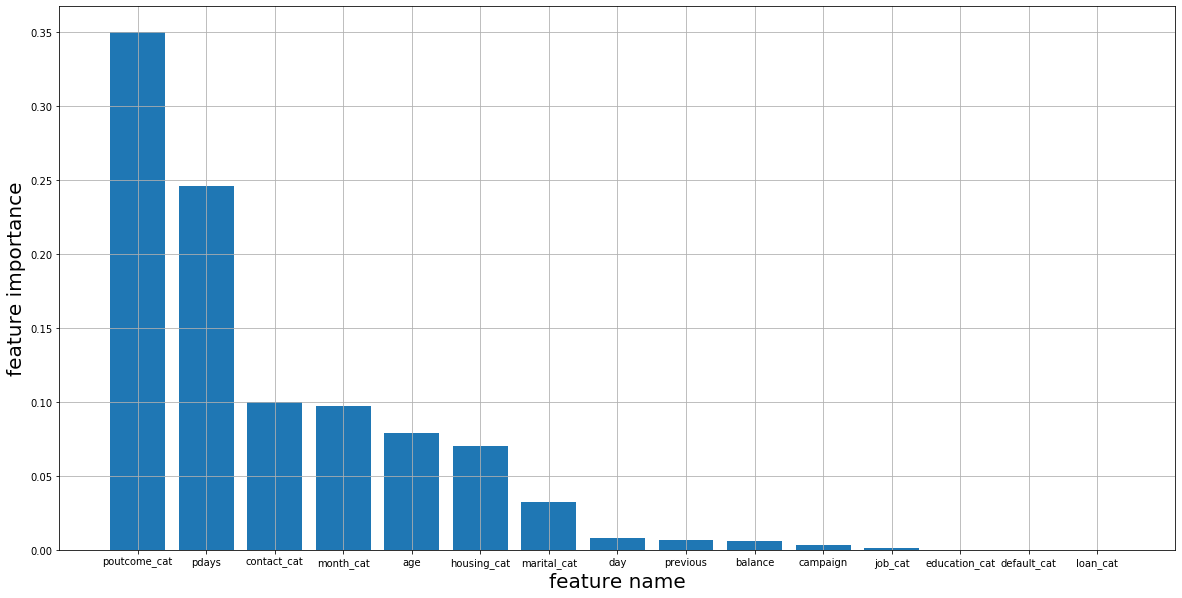

In [62]:
dts.show_features_importance()

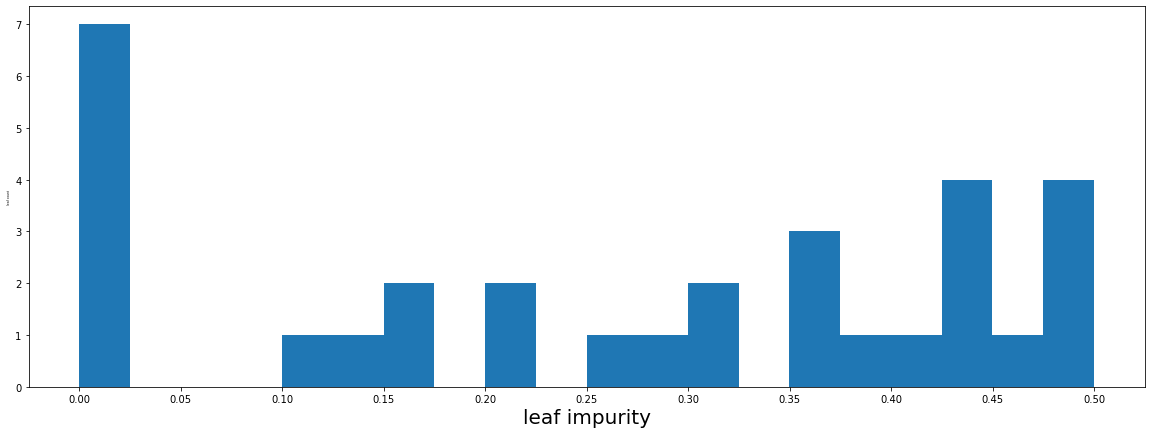

In [63]:
dts.show_leaf_impurity_distribution(bins=20, figsize=(20,7))

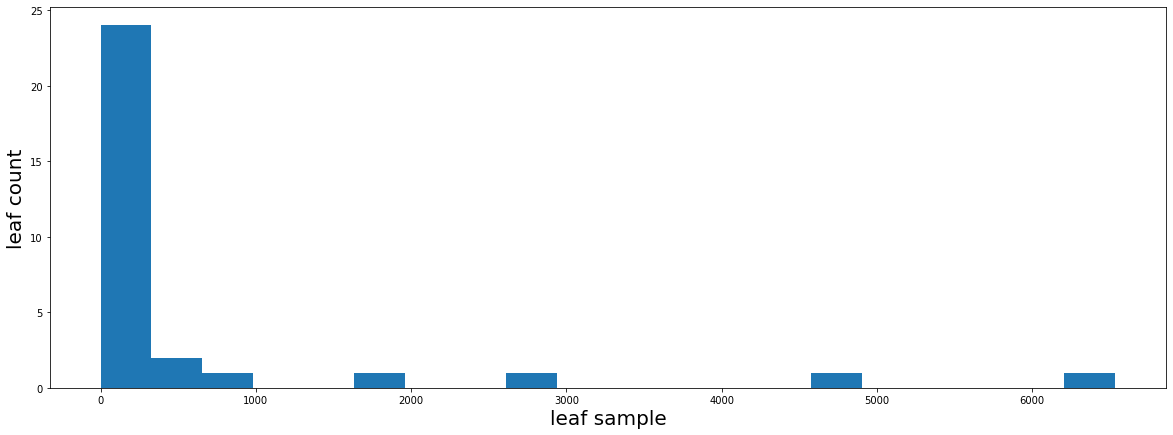

In [64]:
dts.show_leaf_samples_distribution(bins=20, figsize=(20,7))

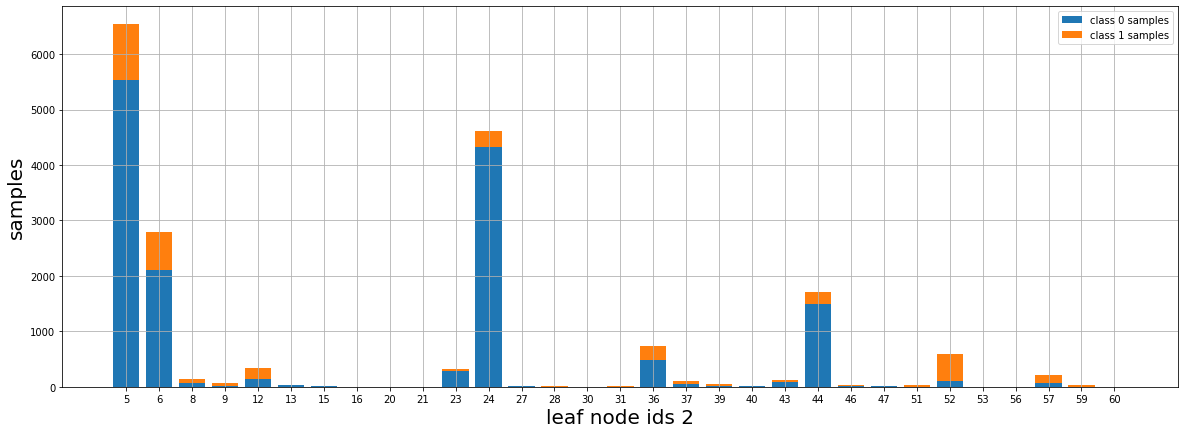

In [69]:
dts.show_leaf_samples_by_class(figsize=(20,7))

In [664]:
for n_estimator in range(1,40):
    rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=5, random_state=random_state)
    rf.fit(train[feature_set], train[target])

    print(f"n_estimators {n_estimator}")
    print(f"training accuracy {accuracy_score(train[target], rf.predict(train[feature_set]))}")
    print(accuracy_score(validation[target], rf.predict(validation[feature_set])))
    print("-----")

n_estimators 1
training accuracy 0.8164230438521066
0.8075476429287863
-----
n_estimators 2
training accuracy 0.8198086844368013
0.8134403209628887
-----
n_estimators 3
training accuracy 0.8234630266552021
0.8146940822467402
-----
n_estimators 4
training accuracy 0.8250214961306965
0.8167001003009027
-----
n_estimators 5
training accuracy 0.8242691315563199
0.8161985957873621
-----
n_estimators 6
training accuracy 0.8232480653482374
0.8158224674022067
-----
n_estimators 7
training accuracy 0.8243228718830611
0.8161985957873621
-----
n_estimators 8
training accuracy 0.8279234737747205
0.8203360080240722
-----
n_estimators 9
training accuracy 0.8272248495270851
0.8202106318956871
-----
n_estimators 10
training accuracy 0.8298581255374032
0.8234704112337011
-----
n_estimators 11
training accuracy 0.8294282029234737
0.8230942828485457
-----
n_estimators 12
training accuracy 0.8296969045571797
0.8232196589769308
-----
n_estimators 13
training accuracy 0.8299118658641444
0.8235957873620863
-